In [5]:
from tensorflow import keras


model1 = keras.models.load_model('./models/pre_model_1_1_10_epochs.h5')
model3 = keras.models.load_model('./models/pre_model_3_1_10_epochs.h5')
model4 = keras.models.load_model('./models/pre_model_4_1_10_epochs.h5')
model5 = keras.models.load_model('./models/pre_model_5_1_10_epochs.h5')
model6 = keras.models.load_model('./models/pre_model_6_1_20_2_epochs.h5')
model7 = keras.models.load_model('./models/pre_model_7_1_10_epochs.h5')
model8 = keras.models.load_model('./models/pre_model_8_1_10_epochs.h5')


In [73]:
all_models = [model1,model3,model4,model5,model6,model7,model8]
rule_names = rules = [
            "Kein Scooter",
            #"Scooter unvollständig/zu wenig Umgebung",
            "Scooter steht zu nah an Straße (Bordsteinkante)",
            "Scooter steht nicht frei",
            "Scooter auf Grünfläche",
            "Scooter blockiert Fahrradständer",
            "Scooter steht an ÖPNV Haltestelle / Parkverbo",
            "Scooter steht in Einfahrt / im Weg"
        ]

In [7]:
from PIL import Image
import numpy as np
# Function to load and resize an image
def load_image(img_path):
    with Image.open(img_path) as img:
        img = img.resize((512, 512))
        img = img.convert('RGB')  # Ensure image is in RGB format
        return np.array(img)


In [29]:
import matplotlib.pyplot as plt

def show_img(img_array):
    img_array.astype('uint8')
    plt.imshow(img_array)
    plt.axis('off')  # Hide the axes
    plt.show()

In [21]:
import os
import random

folder_path = "../Yoio_Park_Proof"
all_files = os.listdir(folder_path)
random_image_file = random.choice(all_files)
img_path = os.path.join(folder_path, random_image_file)
img = load_image(img_path)
img_array = np.expand_dims(img, axis=0)
print(img.shape)

(512, 512, 3)


In [113]:
import os
import random

def predict_image(models):

    folder_path = "../Yoio_Park_Proof"
    all_files = os.listdir(folder_path)
    random_image_file = random.choice(all_files)
    img_path = os.path.join(folder_path, random_image_file)

    img = load_image(img_path)

    for model in models:
        img_array = np.expand_dims(img, axis=0)
        predictions = model.predict(img_array)
        
        #Model 4 predicted Falsch herum i guess
        if models.index(model) !=4 :
            #if predictions[0][0] > predictions[0][1]: Wäre eine Option
            if predictions[0][0]>0.95:
                print("Verstoß")
                print(rules[models.index(model)])
                break
            else:
                print("Richtig")
        else: 
            if predictions[0][1]>0.95:
                print("Verstoß")
                print(rules[models.index(model)])
                break
            else:
                print("Richtig")


    show_img(img)
    

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step
Richtig
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step
Richtig
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step
Richtig
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step
Richtig
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step
Richtig
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step
Richtig
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step
Richtig


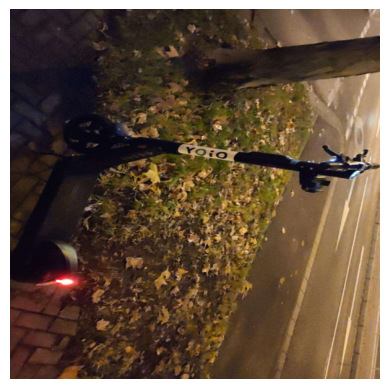

In [116]:
predict_image(models=all_models)